In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [4]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from nn_smoothing_2D import NNSmoothing2D

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/x86_64/ana

W0528 21:03:44.027475 47180897418624 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0528 21:03:44.072809 47180897418624 deprecation_wrapper.py:119] From /talos/u/wangnisn/devel/Machine_learning_dynamics/Bayesian/nn_smoothing_2D.py:14: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [57]:
data = np.load('../data/phase_field_twoD_last641.npy')

In [58]:
data.shape

(641, 424, 224)

In [59]:
data = data[300:400]

In [60]:
data = data[:,200:320,:]

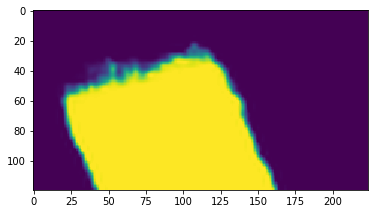

In [61]:
plt.imshow(data[0])

In [62]:
shape = data.shape

In [63]:
t = np.arange(shape[0])
x = np.arange(shape[1])
y = np.arange(shape[2])
t_mesh,x_mesh, y_mesh = np.meshgrid(t,x,y,indexing='ij')
t = t_mesh.flatten()
x = x_mesh.flatten()
y = y_mesh.flatten()

In [64]:
u = data.flatten()

In [65]:
u.shape

(2688000,)

In [66]:
del data

In [67]:
n_samples = 100000

In [68]:
from sklearn.utils import shuffle

In [69]:
u, x, y, t= shuffle(u,x,y,t, random_state=1001)

In [70]:
u = u[:n_samples]
x = x[:n_samples]
y = y[:n_samples]
t = t[:n_samples]

In [71]:
hidden_layers = [ 20, 20, 20, 20, 20, 20, 20]

In [72]:
u.shape

(100000,)

In [73]:
nnsmooth = NNSmoothing2D(x=x, y=y,t=t,u=u, hidden_layers=hidden_layers,alpha=10.0)

In [74]:
nnsmooth.train(10000)

It: 0, Loss: 2.249e+04, Time: 7.79
It: 10, Loss: 1.246e+04, Time: 1.81
It: 20, Loss: 1.178e+04, Time: 1.82
It: 30, Loss: 1.079e+04, Time: 1.80
It: 40, Loss: 9.262e+03, Time: 1.82
It: 50, Loss: 7.292e+03, Time: 1.79
It: 60, Loss: 6.019e+03, Time: 1.83
It: 70, Loss: 5.648e+03, Time: 1.81
It: 80, Loss: 5.242e+03, Time: 1.81
It: 90, Loss: 4.890e+03, Time: 1.78
It: 100, Loss: 4.622e+03, Time: 1.81
It: 110, Loss: 4.413e+03, Time: 1.80
It: 120, Loss: 4.245e+03, Time: 1.83
It: 130, Loss: 4.062e+03, Time: 1.80
It: 140, Loss: 3.836e+03, Time: 1.82
It: 150, Loss: 3.581e+03, Time: 1.78
It: 160, Loss: 3.333e+03, Time: 1.79
It: 170, Loss: 3.148e+03, Time: 1.76
It: 180, Loss: 3.041e+03, Time: 1.78
It: 190, Loss: 2.969e+03, Time: 1.82
It: 200, Loss: 2.894e+03, Time: 1.84
It: 210, Loss: 2.817e+03, Time: 1.83
It: 220, Loss: 2.737e+03, Time: 1.81
It: 230, Loss: 2.652e+03, Time: 1.80
It: 240, Loss: 2.561e+03, Time: 1.82
It: 250, Loss: 2.463e+03, Time: 1.84
It: 260, Loss: 2.355e+03, Time: 1.82
It: 270, Los

It: 2190, Loss: 4.510e+02, Time: 1.87
It: 2200, Loss: 4.509e+02, Time: 1.86
It: 2210, Loss: 4.508e+02, Time: 1.83
It: 2220, Loss: 4.506e+02, Time: 1.88
It: 2230, Loss: 4.505e+02, Time: 1.89
It: 2240, Loss: 4.504e+02, Time: 1.88
It: 2250, Loss: 4.502e+02, Time: 1.86
It: 2260, Loss: 4.503e+02, Time: 1.87
It: 2270, Loss: 4.757e+02, Time: 1.86
It: 2280, Loss: 4.500e+02, Time: 1.88
It: 2290, Loss: 4.509e+02, Time: 1.87
It: 2300, Loss: 4.505e+02, Time: 1.87
It: 2310, Loss: 4.499e+02, Time: 1.90
It: 2320, Loss: 4.494e+02, Time: 1.88
It: 2330, Loss: 4.493e+02, Time: 1.88
It: 2340, Loss: 4.492e+02, Time: 1.88
It: 2350, Loss: 4.490e+02, Time: 1.88
It: 2360, Loss: 4.489e+02, Time: 1.88
It: 2370, Loss: 4.488e+02, Time: 1.88
It: 2380, Loss: 4.487e+02, Time: 1.89
It: 2390, Loss: 4.486e+02, Time: 1.87
It: 2400, Loss: 4.485e+02, Time: 1.87
It: 2410, Loss: 4.484e+02, Time: 1.86
It: 2420, Loss: 4.483e+02, Time: 1.87
It: 2430, Loss: 4.482e+02, Time: 1.87
It: 2440, Loss: 4.481e+02, Time: 1.88
It: 2450, Lo

It: 4350, Loss: 4.373e+02, Time: 1.87
It: 4360, Loss: 4.373e+02, Time: 1.89
It: 4370, Loss: 4.372e+02, Time: 1.89
It: 4380, Loss: 4.372e+02, Time: 1.87
It: 4390, Loss: 4.371e+02, Time: 1.87
It: 4400, Loss: 4.370e+02, Time: 1.85
It: 4410, Loss: 4.370e+02, Time: 1.86
It: 4420, Loss: 4.369e+02, Time: 1.82
It: 4430, Loss: 4.369e+02, Time: 1.85
It: 4440, Loss: 4.637e+02, Time: 1.83
It: 4450, Loss: 4.418e+02, Time: 1.88
It: 4460, Loss: 4.394e+02, Time: 1.86
It: 4470, Loss: 4.375e+02, Time: 1.87
It: 4480, Loss: 4.367e+02, Time: 1.88
It: 4490, Loss: 4.366e+02, Time: 1.88
It: 4500, Loss: 4.364e+02, Time: 1.88
It: 4510, Loss: 4.363e+02, Time: 1.86
It: 4520, Loss: 4.363e+02, Time: 1.86
It: 4530, Loss: 4.362e+02, Time: 1.85
It: 4540, Loss: 4.361e+02, Time: 1.85
It: 4550, Loss: 4.360e+02, Time: 1.89
It: 4560, Loss: 4.360e+02, Time: 1.89
It: 4570, Loss: 4.359e+02, Time: 1.85
It: 4580, Loss: 4.358e+02, Time: 1.85
It: 4590, Loss: 4.357e+02, Time: 1.86
It: 4600, Loss: 4.357e+02, Time: 1.85
It: 4610, Lo

It: 6510, Loss: 4.251e+02, Time: 1.87
It: 6520, Loss: 4.250e+02, Time: 1.90
It: 6530, Loss: 4.250e+02, Time: 1.87
It: 6540, Loss: 4.250e+02, Time: 1.86
It: 6550, Loss: 4.249e+02, Time: 1.86
It: 6560, Loss: 4.251e+02, Time: 1.85
It: 6570, Loss: 4.507e+02, Time: 1.85
It: 6580, Loss: 4.311e+02, Time: 1.85
It: 6590, Loss: 4.280e+02, Time: 1.87
It: 6600, Loss: 4.254e+02, Time: 1.84
It: 6610, Loss: 4.249e+02, Time: 1.84
It: 6620, Loss: 4.248e+02, Time: 1.86
It: 6630, Loss: 4.247e+02, Time: 1.84
It: 6640, Loss: 4.247e+02, Time: 1.86
It: 6650, Loss: 4.246e+02, Time: 1.84
It: 6660, Loss: 4.246e+02, Time: 1.88
It: 6670, Loss: 4.245e+02, Time: 1.86
It: 6680, Loss: 4.245e+02, Time: 1.86
It: 6690, Loss: 4.245e+02, Time: 1.87
It: 6700, Loss: 4.244e+02, Time: 1.90
It: 6710, Loss: 4.244e+02, Time: 1.86
It: 6720, Loss: 4.244e+02, Time: 1.86
It: 6730, Loss: 4.243e+02, Time: 1.85
It: 6740, Loss: 4.243e+02, Time: 1.86
It: 6750, Loss: 4.243e+02, Time: 1.87
It: 6760, Loss: 4.242e+02, Time: 1.88
It: 6770, Lo

It: 8670, Loss: 4.174e+02, Time: 1.81
It: 8680, Loss: 4.390e+02, Time: 1.84
It: 8690, Loss: 4.189e+02, Time: 1.84
It: 8700, Loss: 4.168e+02, Time: 1.83
It: 8710, Loss: 4.165e+02, Time: 1.84
It: 8720, Loss: 4.164e+02, Time: 1.86
It: 8730, Loss: 4.163e+02, Time: 1.88
It: 8740, Loss: 4.163e+02, Time: 1.84
It: 8750, Loss: 4.162e+02, Time: 1.81
It: 8760, Loss: 4.161e+02, Time: 1.87
It: 8770, Loss: 4.160e+02, Time: 1.84
It: 8780, Loss: 4.160e+02, Time: 1.84
It: 8790, Loss: 4.159e+02, Time: 1.86
It: 8800, Loss: 4.158e+02, Time: 1.84
It: 8810, Loss: 4.157e+02, Time: 1.87
It: 8820, Loss: 4.157e+02, Time: 1.86
It: 8830, Loss: 4.156e+02, Time: 1.90
It: 8840, Loss: 4.156e+02, Time: 1.85
It: 8850, Loss: 4.291e+02, Time: 1.83
It: 8860, Loss: 4.283e+02, Time: 1.82
It: 8870, Loss: 4.156e+02, Time: 1.84
It: 8880, Loss: 4.159e+02, Time: 1.85
It: 8890, Loss: 4.157e+02, Time: 1.82
It: 8900, Loss: 4.151e+02, Time: 1.83
It: 8910, Loss: 4.150e+02, Time: 1.86
It: 8920, Loss: 4.149e+02, Time: 1.86
It: 8930, Lo

Loss: 3.696e+02
Loss: 3.694e+02
Loss: 3.691e+02
Loss: 3.689e+02
Loss: 3.687e+02
Loss: 3.685e+02
Loss: 3.683e+02
Loss: 3.680e+02
Loss: 3.677e+02
Loss: 3.675e+02
Loss: 3.672e+02
Loss: 3.670e+02
Loss: 3.668e+02
Loss: 3.666e+02
Loss: 3.663e+02
Loss: 3.660e+02
Loss: 3.658e+02
Loss: 3.656e+02
Loss: 3.656e+02
Loss: 3.655e+02
Loss: 3.653e+02
Loss: 3.651e+02
Loss: 3.649e+02
Loss: 3.647e+02
Loss: 3.645e+02
Loss: 3.644e+02
Loss: 3.642e+02
Loss: 3.642e+02
Loss: 3.639e+02
Loss: 3.638e+02
Loss: 3.637e+02
Loss: 3.637e+02
Loss: 3.636e+02
Loss: 3.634e+02
Loss: 3.632e+02
Loss: 3.631e+02
Loss: 3.629e+02
Loss: 3.629e+02
Loss: 3.627e+02
Loss: 3.625e+02
Loss: 3.624e+02
Loss: 3.622e+02
Loss: 3.620e+02
Loss: 3.618e+02
Loss: 3.617e+02
Loss: 3.615e+02
Loss: 3.615e+02
Loss: 3.613e+02
Loss: 3.612e+02
Loss: 3.610e+02
Loss: 3.609e+02
Loss: 3.607e+02
Loss: 3.606e+02
Loss: 3.604e+02
Loss: 3.603e+02
Loss: 3.601e+02
Loss: 3.599e+02
Loss: 3.597e+02
Loss: 3.594e+02
Loss: 3.591e+02
Loss: 3.587e+02
Loss: 3.585e+02
Loss: 3.

Loss: 3.323e+02
Loss: 3.323e+02
Loss: 3.323e+02
Loss: 3.322e+02
Loss: 3.322e+02
Loss: 3.322e+02
Loss: 3.321e+02
Loss: 3.321e+02
Loss: 3.321e+02
Loss: 3.321e+02
Loss: 3.320e+02
Loss: 3.319e+02
Loss: 3.319e+02
Loss: 3.319e+02
Loss: 3.318e+02
Loss: 3.318e+02
Loss: 3.318e+02
Loss: 3.317e+02
Loss: 3.317e+02
Loss: 3.317e+02
Loss: 3.317e+02
Loss: 3.316e+02
Loss: 3.316e+02
Loss: 3.318e+02
Loss: 3.316e+02
Loss: 3.315e+02
Loss: 3.315e+02
Loss: 3.314e+02
Loss: 3.314e+02
Loss: 3.314e+02
Loss: 3.313e+02
Loss: 3.313e+02
Loss: 3.313e+02
Loss: 3.312e+02
Loss: 3.313e+02
Loss: 3.312e+02
Loss: 3.312e+02
Loss: 3.311e+02
Loss: 3.311e+02
Loss: 3.310e+02
Loss: 3.310e+02
Loss: 3.310e+02
Loss: 3.309e+02
Loss: 3.309e+02
Loss: 3.309e+02
Loss: 3.309e+02
Loss: 3.308e+02
Loss: 3.308e+02
Loss: 3.307e+02
Loss: 3.307e+02
Loss: 3.306e+02
Loss: 3.306e+02
Loss: 3.305e+02
Loss: 3.305e+02
Loss: 3.305e+02
Loss: 3.304e+02
Loss: 3.304e+02
Loss: 3.303e+02
Loss: 3.303e+02
Loss: 3.302e+02
Loss: 3.302e+02
Loss: 3.301e+02
Loss: 3.

Loss: 3.069e+02
Loss: 3.068e+02
Loss: 3.068e+02
Loss: 3.066e+02
Loss: 3.065e+02
Loss: 3.065e+02
Loss: 3.065e+02
Loss: 3.064e+02
Loss: 3.064e+02
Loss: 3.063e+02
Loss: 3.062e+02
Loss: 3.060e+02
Loss: 3.059e+02
Loss: 3.059e+02
Loss: 3.058e+02
Loss: 3.057e+02
Loss: 3.056e+02
Loss: 3.055e+02
Loss: 3.054e+02
Loss: 3.053e+02
Loss: 3.055e+02
Loss: 3.053e+02
Loss: 3.052e+02
Loss: 3.051e+02
Loss: 3.050e+02
Loss: 3.048e+02
Loss: 3.048e+02
Loss: 3.045e+02
Loss: 3.045e+02
Loss: 3.044e+02
Loss: 3.044e+02
Loss: 3.044e+02
Loss: 3.043e+02
Loss: 3.042e+02
Loss: 3.041e+02
Loss: 3.041e+02
Loss: 3.040e+02
Loss: 3.038e+02
Loss: 3.038e+02
Loss: 3.037e+02
Loss: 3.036e+02
Loss: 3.036e+02
Loss: 3.035e+02
Loss: 3.034e+02
Loss: 3.034e+02
Loss: 3.033e+02
Loss: 3.033e+02
Loss: 3.032e+02
Loss: 3.031e+02
Loss: 3.030e+02
Loss: 3.030e+02
Loss: 3.030e+02
Loss: 3.029e+02
Loss: 3.027e+02
Loss: 3.026e+02
Loss: 3.024e+02
Loss: 3.024e+02
Loss: 3.023e+02
Loss: 3.022e+02
Loss: 3.021e+02
Loss: 3.021e+02
Loss: 3.020e+02
Loss: 3.

Loss: 2.818e+02
Loss: 2.818e+02
Loss: 2.817e+02
Loss: 2.817e+02
Loss: 2.817e+02
Loss: 2.817e+02
Loss: 2.816e+02
Loss: 2.816e+02
Loss: 2.816e+02
Loss: 2.816e+02
Loss: 2.815e+02
Loss: 2.816e+02
Loss: 2.815e+02
Loss: 2.815e+02
Loss: 2.815e+02
Loss: 2.814e+02
Loss: 2.814e+02
Loss: 2.813e+02
Loss: 2.814e+02
Loss: 2.813e+02
Loss: 2.813e+02
Loss: 2.812e+02
Loss: 2.812e+02
Loss: 2.811e+02
Loss: 2.811e+02
Loss: 2.811e+02
Loss: 2.810e+02
Loss: 2.810e+02
Loss: 2.810e+02
Loss: 2.810e+02
Loss: 2.809e+02
Loss: 2.811e+02
Loss: 2.809e+02
Loss: 2.809e+02
Loss: 2.808e+02
Loss: 2.807e+02
Loss: 2.807e+02
Loss: 2.807e+02
Loss: 2.806e+02
Loss: 2.806e+02
Loss: 2.806e+02
Loss: 2.806e+02
Loss: 2.806e+02
Loss: 2.805e+02
Loss: 2.805e+02
Loss: 2.805e+02
Loss: 2.804e+02
Loss: 2.804e+02
Loss: 2.804e+02
Loss: 2.803e+02
Loss: 2.803e+02
Loss: 2.803e+02
Loss: 2.802e+02
Loss: 2.802e+02
Loss: 2.802e+02
Loss: 2.801e+02
Loss: 2.800e+02
Loss: 2.800e+02
Loss: 2.800e+02
Loss: 2.800e+02
Loss: 2.800e+02
Loss: 2.800e+02
Loss: 2.

Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.719e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.718e+02
Loss: 2.717e+02
Loss: 2.717e+02
Loss: 2.717e+02
Loss: 2.717e+02
Loss: 2.719e+02
Loss: 2.717e+02
Loss: 2.717e+02
Loss: 2.716e+02
Loss: 2.716e+02
Loss: 2.716e+02
Loss: 2.716e+02
Loss: 2.716e+02
Loss: 2.716e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.715e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.714e+02
Loss: 2.713e+02
Loss: 2.715e+02
Loss: 2.713e+02
Loss: 2.713e+02
Loss: 2.713e+02
Loss: 2.713e+02
Loss: 2.713e+02
Loss: 2.712e+02
Loss: 2.712e+02
Loss: 2.712e+02
Loss: 2.712e+02
Loss: 2.712e+02
Loss: 2.712e+02
Loss: 2.711e+02
Loss: 2.711e+02
Loss: 2.711e+02
Loss: 2.711e+02
Loss: 2.711e+02
Loss: 2.711e+02
Loss: 2.

Loss: 2.649e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.648e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.647e+02
Loss: 2.646e+02
Loss: 2.646e+02
Loss: 2.646e+02
Loss: 2.646e+02
Loss: 2.646e+02
Loss: 2.645e+02
Loss: 2.645e+02
Loss: 2.645e+02
Loss: 2.645e+02
Loss: 2.645e+02
Loss: 2.644e+02
Loss: 2.645e+02
Loss: 2.644e+02
Loss: 2.644e+02
Loss: 2.644e+02
Loss: 2.644e+02
Loss: 2.646e+02
Loss: 2.644e+02
Loss: 2.643e+02
Loss: 2.643e+02
Loss: 2.643e+02
Loss: 2.644e+02
Loss: 2.643e+02
Loss: 2.643e+02
Loss: 2.643e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.642e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.641e+02
Loss: 2.

Loss: 2.593e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.592e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.591e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.590e+02
Loss: 2.589e+02
Loss: 2.590e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.589e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.588e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.587e+02
Loss: 2.

Loss: 2.551e+02
Loss: 2.551e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.550e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.549e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.548e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.547e+02
Loss: 2.546e+02
Loss: 2.546e+02
Loss: 2.

Loss: 2.514e+02
Loss: 2.514e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.513e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.512e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.511e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.510e+02
Loss: 2.

Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.483e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.482e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.481e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.480e+02
Loss: 2.479e+02
Loss: 2.479e+02
Loss: 2.479e+02
Loss: 2.480e+02
Loss: 2.479e+02
Loss: 2.479e+02
Loss: 2.479e+02
Loss: 2.

Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.455e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.454e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.453e+02
Loss: 2.

KeyboardInterrupt: 

In [75]:
t = np.arange(shape[0])
x = np.arange(shape[1])
y = np.arange(shape[2])
t_mesh,x_mesh, y_mesh = np.meshgrid(t,x,y,indexing='ij')
t = t_mesh.flatten()
x = x_mesh.flatten()
y = y_mesh.flatten()

In [76]:
u_pred, u_t_pred, u_x_pred, u_y_pred, u_xx_pred, u_xy_pred, u_yy_pred = nnsmooth.predict(x,y,t)

In [77]:
shape

(100, 120, 224)

In [78]:
u_pred = np.reshape(u_pred, shape)
u_t_pred = np.reshape(u_t_pred, shape)
u_x_pred = np.reshape(u_x_pred, shape)
u_y_pred = np.reshape(u_y_pred, shape)
u_xx_pred = np.reshape(u_xx_pred, shape)
u_xy_pred = np.reshape(u_xy_pred, shape)
u_yy_pred = np.reshape(u_yy_pred, shape)


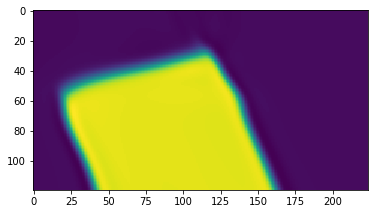

In [79]:
plt.imshow(u_pred[0])

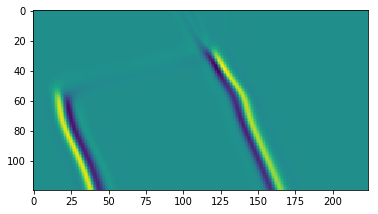

In [80]:
plt.imshow(u_yy_pred[0])

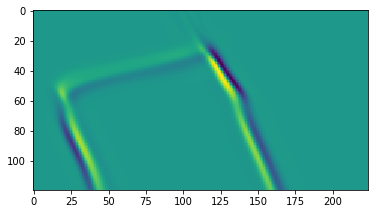

In [81]:
plt.imshow(u_xy_pred[0])

In [84]:
np.save('train_data_experiment_2D',np.vstack([u_pred.flatten(),u_x_pred.flatten(),u_y_pred.flatten(),u_xx_pred.flatten(),u_xy_pred.flatten(), u_yy_pred.flatten(), u_t_pred.flatten()]).T)